In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir(r'/content')

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip

--2020-08-18 12:12:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80417803 (77M) [application/x-httpd-php]
Saving to: ‘DevanagariHandwrittenCharacterDataset.zip.1’

DevanagariHandwritt 100%[===================>]  76.69M  36.7MB/s    in 2.1s    

2020-08-18 12:12:17 (36.7 MB/s) - ‘DevanagariHandwrittenCharacterDataset.zip.1’ saved [80417803/80417803]



In [4]:
!unzip DevanagariHandwrittenCharacterDataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104099.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104101.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12716.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12723.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12724.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12725.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12726.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12727.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12731.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12732.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12735.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/13584.png  
 extracting: Devanagari

In [5]:
from fastai.vision import *
from fastai.metrics import accuracy

In [6]:
data = ImageDataBunch.from_folder(path = Path(r'/content/DevanagariHandwrittenCharacterDataset'), ds_tfms = get_transforms(do_flip = False), size = 228, bs = 64).normalize(imagenet_stats)

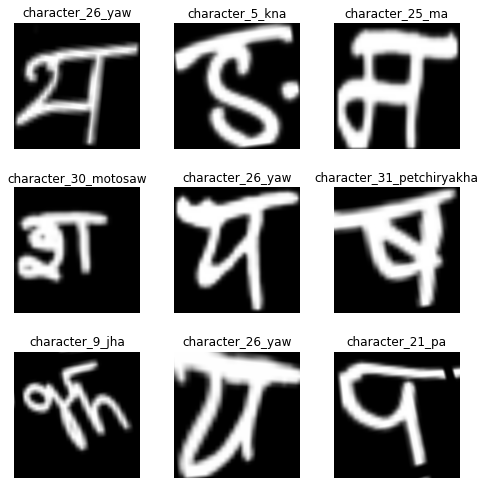

In [7]:
data.show_batch(rows = 3, figsize = (7, 7))

In [8]:
learn = cnn_learner(data, models.resnet50, metrics = accuracy, model_dir = r'/content/model' )

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.330575,0.133030,0.957174,23:54
1,0.148665,0.051309,0.984420,23:49
2,0.071016,0.027012,0.991159,23:50
3,0.063139,0.022126,0.992899,23:47


In [10]:
learn.save('Stage - 1')